# Capstone Project - The Battle of Neighborhoods (Week 1)

The objective of this project was to analyze California cities contamination and determine whether the percentaje of parks (relative to all venues in each city) within each cluster had a relation with the air quality data.

As mentioned before, this information comes from the United States Environmental Protection Agency (US EPA), Wikipedia and kaggle. 

After cleaning and preparing the data, cities will be clustered according to their air quality index, and correlation analysis will be performed within each cluster.

**<span style="text-decoration: underline">Data collection</span>** 

* part 1= californian cities population density data
* part 2= californian cities latitude and longitude data
* part 3= air quality data

* part 4= final dataframe and preliminar analysis

* part 5= California cities venues data

## _1A- California cities population data_

California cities population data was imported from Wikipedia [100 most populated cities]. The data was collected as a dataframe.

_Import packages_

In [65]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

_URL, Request and Response_

In [66]:
url = "https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_population"
r = requests.Session()
response= r.get(url, timeout=10)
response

<Response [200]>

_Wrangling HTML With BeautifulSoup_

In [67]:
soup = BeautifulSoup(response.content, 'html.parser')

_Title of HTML Table_

In [68]:
title=soup.title.string
title

'List of largest California cities by population - Wikipedia'

In [69]:
California_table=soup.find('table',{'class':'wikitable sortable'})
for row in California_table.findAll("tr"):
    cells = row.findAll('td')
print('Data description \n* number of columns:', len(cells)) #number of cols

rows = California_table.findAll("tr")
print('* number of rows:', len(rows)) #number of rows

Data description 
* number of columns: 6
* number of rows: 101


_Get header_

In [70]:
header = [th.text.rstrip() for th in rows[0].find_all('th')]
print(header)

['2019\xa0Rank[1]', 'City', 'Population(2019\xa0est.)[1]', 'County', 'Image', 'Description']


_Get tabular data_

In [71]:
first_data_raw=1

lst_data_raw=[]
for row in rows[first_data_raw:]:
    tds = row.select('td')
    code = tds[0]
    data = [code.text.rstrip()]
    data.extend([d.text.rstrip() for d in tds[1:]])
    lst_data_raw.append(data)


_Create dictionary_

In [72]:
datax = list(zip(*lst_data_raw))
dat = dict(zip(header, datax))

_Create data frame and get city+population_

In [73]:
df = pd.DataFrame(dat)

In [74]:
df0= df[['City','Population(2019\xa0est.)[1]']]

_Rename column "population"_

In [75]:
df0 = df0.rename(columns={'Population(2019\xa0est.)[1]': 'Population'})
df0.head()


,City,Population
0,Los Angeles,"3,979,576"
1,San Diego,"1,423,851"
2,San Jose,"1,021,795"
3,San Francisco,"881,549"
4,Fresno,"531,576"


_Check cleaned data frame shape_

In [76]:
df0.shape

(100, 2)

## _1B- California cities total area data (25 largest)_

California cities land area data was imported from Wikipedia [25 largest cities] in order to calculate population _density_, since population alone might not represent faithfully cities size and transit (which might be more related to contamination). The data was collected as explained before and obtained as a dataframe.

_URL, Request and Response_

In [77]:
url2 = "https://en.wikipedia.org/wiki/List_of_largest_California_cities_by_land_area"
r = requests.Session()
response= r.get(url2, timeout=10)
response

<Response [200]>

In [78]:
soup1 = BeautifulSoup(response.content, 'html.parser')

_Table title_

In [79]:
title=soup1.title.string
title

'List of largest California cities by land area - Wikipedia'

_Build dataframe_

In [80]:
land=soup1.find('table',{'class':'wikitable sortable'})
for row in land.findAll("tr"):
    cells = row.findAll('td')
print('Data description \n* number of columns:', len(cells)) #number of cols

rows = land.findAll("tr")
print('* number of rows:', len(rows)) #number of rows

Data description 
* number of columns: 7
* number of rows: 26


In [81]:
headerL = [th.text.rstrip() for th in rows[0].find_all('th')]
print('header:', headerL)



header: ['Rank', 'City', 'Land area', 'Water area', 'Total area', 'Population (2010)[1]', 'Population Density']


_Create dataframe_

In [82]:
data_raw=1

st_data_raw=[]
for row in rows[data_raw:]:
    tds = row.select('td')
    code = tds[0]
    data = [code.text.rstrip()]
    data.extend([d.text.rstrip() for d in tds[1:]])
    st_data_raw.append(data)


In [83]:
dattax = list(zip(*st_data_raw))
datt = dict(zip(headerL, dattax))

In [84]:
dframe = pd.DataFrame(datt)

In [85]:
dframe=dframe[['City','Land area']]

In [86]:
dframe.shape

(25, 2)

# _1C- Population density calculation_

The dataframes containing population and area data for each city in California were merged as a new dataframe, in order to calculate population density

In [87]:
df00=pd.merge(df0,dframe,on='City', how='inner')

In [88]:
df00.shape

(20, 3)

_regex was used to clean **Land area** column data (necessary for later calculations), and to transform **Population** data as float type_

In [89]:
df00.head()

,City,Population,Land area
0,Los Angeles,"3,979,576","468.7 sq mi (1,214 km2)"
1,San Diego,"1,423,851",325.2 sq mi (842 km2)
2,San Jose,"1,021,795",176.5 sq mi (457 km2)
3,Fresno,"531,576",111.9 sq mi (290 km2)
4,Sacramento,"513,624",97.9 sq mi (254 km2)


In [90]:
df00["Land_area_sq_mi_"] = df00['Land area'].str.extract("(\d*\.?\d+)", expand=True)

In [91]:
df00=df00[['City','Population','Land_area_sq_mi_']]

In [92]:
df00.head()

,City,Population,Land_area_sq_mi_
0,Los Angeles,"3,979,576",468.7
1,San Diego,"1,423,851",325.2
2,San Jose,"1,021,795",176.5
3,Fresno,"531,576",111.9
4,Sacramento,"513,624",97.9


In [93]:
import re    

df00['Population'] = pd.to_numeric(df00['Population'].apply(lambda x: re.sub(',', '', str(x))))


_Data was transformed to float type_

In [94]:
df00['Population'] = df00.Population.astype(float)
df00['Land_area_sq_mi_'] = df00.Land_area_sq_mi_.astype(float)

_New column where population density was calculated (total population / land area):_

In [95]:
df00["Population density"] = df00['Population']/df00['Land_area_sq_mi_']

In [96]:
df00.head()

,City,Population,Land_area_sq_mi_,Population density
0,Los Angeles,3979576.0,468.7,8490.667805
1,San Diego,1423851.0,325.2,4378.385609
2,San Jose,1021795.0,176.5,5789.206799
3,Fresno,531576.0,111.9,4750.455764
4,Sacramento,513624.0,97.9,5246.414709


_Since not all the data contained in the df00 dataframe was necessary, "df1" with the **city** and **population_density** columns was created_

In [97]:
df1=df00[['City','Population density']]
df1.head()

,City,Population density
0,Los Angeles,8490.667805
1,San Diego,4378.385609
2,San Jose,5789.206799
3,Fresno,4750.455764
4,Sacramento,5246.414709


## _2- Latitude and Longitude data_

In order to draw each city in a California map and to get cities venues, latitude and longitude data was dowloaded from the url mentioned next. Then, data was cleaned and merged to the Population density dataframe ("df1") in a new dataframe called "new_df".

_download latitude and longitude data_

In [98]:
#data was downloaded from https://www.kaggle.com/camnugent/california-housing-feature-engineering?select=cal_cities_lat_long.csv

df_gps= pd.read_csv('/Users/FR/Desktop/California_latlong.csv', sep=';') # path
df_gps.head()

,Location,Latitude,Longitude
0,Acalanes Ridge,37.90,-122.08
1,Acampo,38.17,-121.28
2,Acton,34.50,-118.19
3,Adelanto city,34.59,-117.44
4,Adin,41.20,-120.95


_Remove "city" or "City" from Cities names_

_The **Location** column indicated cities names where the word "city" or "City" was in some of the rows. Since this lat/long data will be appended to the cities population density dataframe using inner join on "City" column, it was absolutly necessary that cities were named the same in both dataframes (the ones to be merged), ir order to avoid losing important data_

In [99]:
gps=df_gps.replace(' city','', regex=True).replace(' City','', regex=True)
gps.head()

,Location,Latitude,Longitude
0,Acalanes Ridge,37.90,-122.08
1,Acampo,38.17,-121.28
2,Acton,34.50,-118.19
3,Adelanto,34.59,-117.44
4,Adin,41.20,-120.95


In [100]:
dataframe=df1.replace(' city','', regex=True).replace(' City','', regex=True)

In [101]:
dataframe.head()

,City,Population density
0,Los Angeles,8490.667805
1,San Diego,4378.385609
2,San Jose,5789.206799
3,Fresno,4750.455764
4,Sacramento,5246.414709


_Change 'Location' to 'City' in gps dataframe_

In [102]:
gps1= gps.rename(columns={'Location': 'City'})

### Intermediate DF
_Merge dataframes: a new dataframe named "new_df" that contains Cities names, population density and lat/long data is created_

In [103]:
new_df=pd.merge(gps1,dataframe,on='City', how='inner')

In [104]:
#Check cities
Cities=[]
for row in new_df['City']:
    Cities.append(row)
print(Cities)

['Bakersfield', 'Fremont', 'Fresno', 'Hesperia', 'Irvine', 'Lancaster', 'Los Angeles', 'Moreno Valley', 'Oakland', 'Palmdale', 'Redding', 'Riverside', 'Sacramento', 'San Bernardino', 'San Diego', 'San Jose', 'Santa Clarita', 'Stockton', 'Thousand Oaks', 'Victorville']


In [105]:
new_df.shape

(20, 4)

In [106]:
new_df.head()

,City,Latitude,Longitude,Population density
0,Bakersfield,35.35,-119.03,2565.584719
1,Fremont,37.52,-122.00,3111.096774
2,Fresno,36.78,-119.79,4750.455764
3,Hesperia,34.40,-117.31,1309.849521
4,Irvine,33.68,-117.77,4347.972769


## _3- Air Quality Index Data_

California Air Quality data (AQI) was downloaded from United States Environmental Protection Agency (US EPA). 

The data corresponds to the number of days where air quality was considered Good(G), Moderate(M), Unhealthy for sensitive groups(USG), unhealhy(U) or Very unhealthy(VU) according to US EPA standards. 
__________

_**California** Air Quality Index Data_

_data cleaning: All the cities in the US EPA database had **', CA'** after the name. As explained before, it is necessary to unify criteria for cities names. Hence, **', CA'** was removed from the AQI dataframe_


In [107]:
#https://www.epa.gov/outdoor-air-quality-data/air-quality-index-report

dfAQ= pd.read_csv('/Users/FR/Desktop/aqireport2019.csv', sep=',') #path
dfAQ1=dfAQ.replace(', CA','', regex=True)
dfAQ1.head()

,CBSA Code,CBSA,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days SO2,# Days PM2.5,# Days PM10
0,12540,Bakersfield,365,119,151,87,6,2,548,122,67,.,2,254,.,78,31
1,13860,Bishop,365,232,121,6,2,4,638,84,47,.,.,318,.,14,33
2,17020,Chico,365,224,136,3,2,.,173,67,46,.,.,226,.,138,1
3,17340,Clearlake,360,360,.,.,.,.,50,41,31,.,.,356,.,3,1
4,18860,Crescent City,248,236,12,.,.,.,71,43,20,.,.,.,.,248,.


_Air Quality dataframe contained more data than necessary for this analysis, so ".iloc" was used to get data from columns 1 to 7_

In [108]:
dfAQ2 = dfAQ1.iloc[:, 1:8].copy()

_Change columns names (just because it's simplier to work with smaller names)_

In [109]:
dfAQ2 = dfAQ2.rename(columns={'Good': 'G'})
dfAQ2 = dfAQ2.rename(columns={'Moderate': 'M'})
dfAQ2 = dfAQ2.rename(columns={'Unhealthy for Sensitive Groups': 'USG'})
dfAQ2 = dfAQ2.rename(columns={'Unhealthy': 'U'})
dfAQ2 = dfAQ2.rename(columns={'Very Unhealthy': 'VU'})


**_prearing data: transform "·" to zeros_**

In [110]:
dfAQ2.loc[dfAQ2.G == ".", 'G'] = int(0)
dfAQ2.loc[dfAQ2.M == ".", 'M'] = int(0)
dfAQ2.loc[dfAQ2.USG == ".", 'USG'] = int(0)
dfAQ2.loc[dfAQ2.U == ".", 'U'] = int(0)
dfAQ2.loc[dfAQ2.VU == ".", 'VU'] = int(0)


**_prearing data: transform data to int type (needed to perform calculations)_**

In [111]:
dfAQ2['G'] = dfAQ2.G.astype(int)
dfAQ2['M'] = dfAQ2.M.astype(int)
dfAQ2['U'] = dfAQ2.U.astype(int)
dfAQ2['VU'] = dfAQ2.VU.astype(int)
dfAQ2['USG'] = dfAQ2.USG.astype(int)
# dfAQ2.dtypes #to check types

**_prearing data: Calculate percentaje of Good (G), Moderate (M), Unhealty (U), Very Unhealthy (VU) and Unhealty to sensitive groups (USG) data (relative to the number of days with available data), for each city in california_**

In [112]:
dfAQ2['G%'] = dfAQ2['G']/dfAQ2['# Days with AQI']
dfAQ2['M%'] = dfAQ2['M']/dfAQ2['# Days with AQI']
dfAQ2['USG%'] = dfAQ2['USG']/dfAQ2['# Days with AQI']
dfAQ2['U%'] = dfAQ2['U']/dfAQ2['# Days with AQI']
dfAQ2['VU%'] = dfAQ2['VU']/dfAQ2['# Days with AQI']

AQI = dfAQ2[['CBSA','G%', 'M%', 'USG%', 'U%', 'VU%']]
AQI=AQI.replace('--','-', regex=True)


## _4- Final data frame_

_Merge Air Quality data to cities dataframe that contain population density and Lat/long data (new_df)_

In [113]:
# duplicate data for grouped cities (in air quality data)
AQI2=AQI.assign(CBSA = AQI['CBSA'].str.split('-')).explode('CBSA').reset_index(drop=True)
AQI2 = AQI2.rename(columns={'CBSA': 'City'})

In [114]:
final_df=pd.merge(new_df,AQI2,on='City', how='inner')

In [115]:
final_df.shape

(12, 9)

In [116]:
final_df

,City,Latitude,Longitude,Population density,G%,M%,USG%,U%,VU%
0,Bakersfield,35.35,-119.03,2565.584719,0.326027,0.413699,0.238356,0.016438,0.005479
1,Fresno,36.78,-119.79,4750.455764,0.380822,0.438356,0.175342,0.005479,0.000000
2,Los Angeles,34.11,-118.41,8490.667805,0.180822,0.569863,0.169863,0.076712,0.002740
3,Oakland,37.77,-122.22,7760.412186,0.695890,0.279452,0.024658,0.000000,0.000000
4,Redding,40.57,-122.37,1553.523490,0.854396,0.145604,0.000000,0.000000,0.000000
5,Riverside,33.94,-117.39,4085.819975,0.115068,0.487671,0.216438,0.158904,0.021918
6,Sacramento,38.57,-121.47,5246.414709,0.471233,0.471233,0.057534,0.000000,0.000000
7,San Bernardino,34.14,-117.30,3645.000000,0.115068,0.487671,0.216438,0.158904,0.021918
8,San Diego,32.82,-117.13,4378.385609,0.238356,0.693151,0.063014,0.005479,0.000000
9,San Jose,37.30,-121.85,5789.206799,0.720548,0.268493,0.010959,0.000000,0.000000


____________
Plot relation between population density and each category for air quality (scatter plot)

In [119]:
plt_X= final_df['Population density']
plt_G= final_df['G%']
plt_M= final_df['M%']
plt_U= final_df['U%']
plt_VU= final_df['VU%']
plt_USG= final_df['USG%']


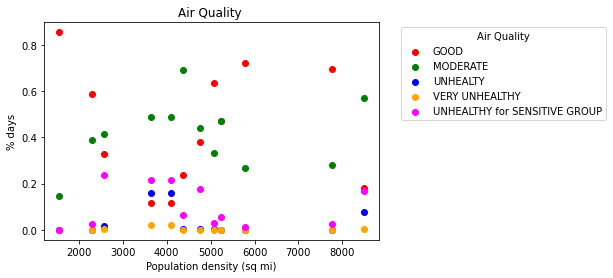

In [120]:


pG=plt.scatter(plt_X,plt_G, color="red", label= 'GOOD')
pM=plt.scatter(plt_X, plt_M, color="green", label= 'MODERATE')
pU=plt.scatter(plt_X, plt_U, color="blue", label= 'UNHEALTY')
pVU=plt.scatter(plt_X, plt_VU, color="orange", label= 'VERY UNHEALTHY')
pUSG=plt.scatter(plt_X, plt_USG, color="magenta", label= 'UNHEALTHY for SENSITIVE GROUP')



plt.xlabel('Population density (sq mi)')
plt.ylabel('% days')
plt.title("Air Quality ")
plt.legend(handles=[pG, pM, pU, pVU, pUSG], title='Air Quality', bbox_to_anchor=(1.05, 1), loc='upper left')

#### Unexpectedly, there does not seem to be a correlation between % of good days (or the other categories) and population density. 
#### % of Moderate days is the only category for which there seems to be a positive relation between air quality and population density, but only between 0 - 4500/sq mi. 
### Therefore, population density will be excluded from the clustering analysis

-----------

# _5- California venues_


_import libraries_

In [121]:
import numpy as np
import json 
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 

_Get the latitude and longitude values of California._

In [122]:
address = 'California, US'

geolocator = Nominatim(user_agent="california_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of California are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of California are 36.7014631, -118.755997.


_Create a map of California with cities superimposed on top **(only cities in the final DF)**_

In [123]:
map_california = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, City in zip(final_df['Latitude'], final_df['Longitude'],final_df['City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_california)  
    
map_california

_Define Foursquare Credentials and Version_

In [1]:
CLIENT_ID = '----' # were removed for privacy
CLIENT_SECRET = '----' # were removed for privacy
VERSION = '20180605' 
LIMIT = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ----
CLIENT_SECRET:----


_Function to get nearby venues_

In [125]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

_California venues dataframe_

In [126]:
California_venues = getNearbyVenues(names=final_df['City'],
                                   latitudes=final_df['Latitude'],
                                   longitudes=final_df['Longitude'])

In [127]:
analyzed_cities=California_venues['City'].unique()

_Number of venues in California final_df, grouped by City_

In [128]:
California_venues.groupby('City').count()
print('There are {} uniques categories.'.format(len(California_venues['Venue Category'].unique())))

There are 75 uniques categories.


_New data frame with the different venue categories as columns, and rows=cities **GROUPED BY CITY**_

In [129]:
cal_onehot = pd.get_dummies(California_venues[['Venue Category']], prefix="", prefix_sep="")
cal_onehot['City'] = California_venues['City'] 
fixed_columns = [cal_onehot.columns[-1]] + list(cal_onehot.columns[:-1])
cal_onehot = cal_onehot[fixed_columns]
cal_grouped = cal_onehot.groupby('City').mean().reset_index() ### grouped by city


In [130]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

_new dataframe with the top 10 venues for each City (sorted in descending order)_

In [131]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = cal_grouped['City']

for ind in np.arange(cal_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cal_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bakersfield,Hot Dog Joint,Health & Beauty Service,Pizza Place,Mexican Restaurant,Gas Station,Falafel Restaurant,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store
1,Fresno,Mexican Restaurant,Chinese Restaurant,Mobile Phone Shop,Cosmetics Shop,Fried Chicken Joint,Movie Theater,Fast Food Restaurant,Pizza Place,Sandwich Place,Coffee Shop
2,Los Angeles,Trail,Playground,Yoga Studio,Gas Station,Diner,Falafel Restaurant,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store
3,Oakland,Mexican Restaurant,Café,Grocery Store,Furniture / Home Store,Yoga Studio,Hardware Store,Gymnastics Gym,Gym / Fitness Center,Gas Station,Fast Food Restaurant
4,Redding,American Restaurant,Pizza Place,Sushi Restaurant,Rental Car Location,Mexican Restaurant,Gas Station,Storage Facility,Sports Bar,Breakfast Spot,Automotive Shop
5,Riverside,Convenience Store,Video Store,Toy / Game Store,Comic Shop,Massage Studio,Yoga Studio,Gastropub,Fast Food Restaurant,Food Truck,Fried Chicken Joint
6,Sacramento,Coffee Shop,Italian Restaurant,Park,Burger Joint,Mexican Restaurant,Sushi Restaurant,Gym / Fitness Center,Modern European Restaurant,Mobile Phone Shop,Lounge
7,San Bernardino,Fast Food Restaurant,Convenience Store,Fried Chicken Joint,Burger Joint,Mexican Restaurant,Yoga Studio,Gift Shop,Food Truck,Furniture / Home Store,Gas Station
8,San Diego,Gym,Café,Cajun / Creole Restaurant,Clothing Store,Yoga Studio,Gift Shop,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store
9,San Jose,Plaza,Athletics & Sports,Kids Store,Mexican Restaurant,Gastropub,Falafel Restaurant,Fast Food Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store


_new dataframe with % parks for each City_

In [132]:
parks=cal_grouped[['City','Park', 'State / Provincial Park']]

_list of different venues_

In [133]:
Venues=[]
for row in California_venues['Venue Category']:
    Venues.append(row)
print(Venues)

['Hot Dog Joint', 'Pizza Place', 'Mexican Restaurant', 'Health & Beauty Service', 'Coffee Shop', 'Mexican Restaurant', 'Burger Joint', 'Fried Chicken Joint', 'Movie Theater', 'Mexican Restaurant', 'Breakfast Spot', 'Cosmetics Shop', 'Mobile Phone Shop', 'Chinese Restaurant', 'Mobile Phone Shop', 'Shopping Mall', 'Chinese Restaurant', 'Fast Food Restaurant', 'Steakhouse', 'Pizza Place', 'Sandwich Place', 'Mexican Restaurant', 'Hardware Store', 'Mexican Restaurant', 'Playground', 'Trail', 'Mexican Restaurant', 'Vegetarian / Vegan Restaurant', 'Yoga Studio', 'Mexican Restaurant', 'Mexican Restaurant', 'Grocery Store', 'Mexican Restaurant', 'Gym / Fitness Center', 'Thai Restaurant', 'Hardware Store', 'Intersection', 'Furniture / Home Store', 'Gas Station', 'Furniture / Home Store', 'Fast Food Restaurant', 'Gymnastics Gym', 'Café', 'Café', 'Grocery Store', 'Sushi Restaurant', 'American Restaurant', 'Storage Facility', 'Pizza Place', 'Pizza Place', 'Rental Car Location', 'Automotive Shop', '

----------------